In [2]:
#Load Libraries
import pandas as pd
import sqlite3 as sqlite3
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [5]:
# Load the data into a DataFrame

con = sqlite3.connect("data/wildfire.sqlite")
fires = pd.read_sql_query(
    "select NWCG_REPORTING_AGENCY,CONT_DATE - DISCOVERY_DATE as CONT_TIME, \
    LONGITUDE,LATITUDE,OWNER_CODE,SOURCE_SYSTEM_TYPE,DISCOVERY_DATE,\
    DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE from fires", con)
con.close()

In [6]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   NWCG_REPORTING_AGENCY  object 
 1   CONT_TIME              float64
 2   LONGITUDE              float64
 3   LATITUDE               float64
 4   OWNER_CODE             float64
 5   SOURCE_SYSTEM_TYPE     object 
 6   DISCOVERY_DATE         float64
 7   DISCOVERY_DOY          int64  
 8   STAT_CAUSE_DESCR       object 
 9   FIRE_SIZE              float64
dtypes: float64(6), int64(1), object(3)
memory usage: 143.5+ MB


In [8]:
fires = fires.drop_duplicates()
fires.shape

(1874345, 10)

In [9]:
fires = fires.dropna()
fires.shape

(985182, 10)

In [12]:
fires1 = fires[(fires["STAT_CAUSE_DESCR"] != "Missing/Undefined") & (fires["STAT_CAUSE_DESCR"] != "Miscellaneous")]
fires1.shape

(751420, 10)

<Axes: >

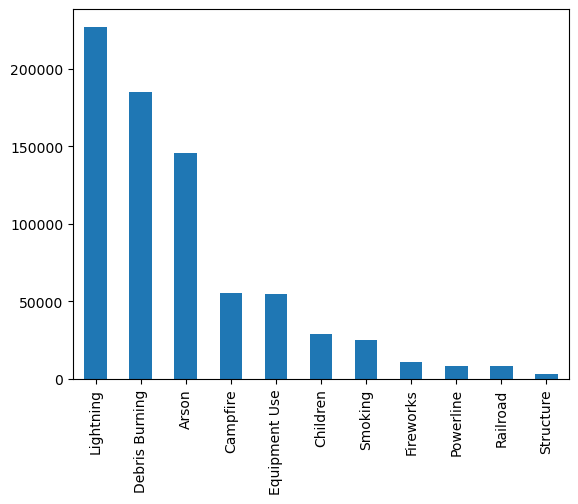

In [13]:
fires1["STAT_CAUSE_DESCR"].value_counts().plot.bar()


In [19]:
xFires=fires1.loc[:,fires1.columns != 'STAT_CAUSE_DESCR']
yFires=fires1['STAT_CAUSE_DESCR']

#Training and test set split
xTrain,xTest,yTrain,yTest=train_test_split(xFires,yFires,\
                           test_size=0.1,random_state =441)

xTrain.shape
# yTrain.shape

(676278, 9)

In [20]:
counts = yTrain.value_counts()
counts

Lightning         204604
Debris Burning    166208
Arson             130883
Campfire           49611
Equipment Use      49097
Children           26230
Smoking            22438
Fireworks           9414
Powerline           7564
Railroad            7485
Structure           2744
Name: STAT_CAUSE_DESCR, dtype: int64

<Axes: >

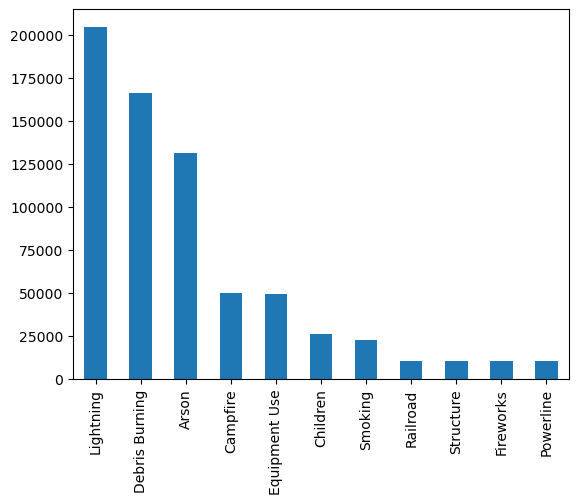

In [21]:
from imblearn.over_sampling import RandomOverSampler

def count_under_10000(colname):
    if counts[colname] < 10000:
        return 10000
    return counts[colname]

#Perform undersampling
OverSampleRatio = {
    'Lightning' : count_under_10000('Lightning'), 'Debris Burning' : count_under_10000('Debris Burning'), 'Campfire' : count_under_10000('Campfire'), 
    'Equipment Use' : count_under_10000('Equipment Use'),    
    'Arson' : count_under_10000('Arson'), 'Children' : count_under_10000('Children'), 'Railroad' : count_under_10000('Railroad'),
    'Smoking' : count_under_10000('Smoking'), 'Powerline' : count_under_10000('Powerline'),
    'Fireworks' : count_under_10000('Fireworks'), 'Structure' : count_under_10000('Structure')
}

newSampStrat=RandomOverSampler(sampling_strategy=OverSampleRatio,random_state=441) #Goal balance all classes
xTrain,yTrain=newSampStrat.fit_resample(xTrain,yTrain) #perform the balancing newX and newY are balanced X and y
yTrain.value_counts().plot.bar()  #print result showing the nunmber of observation in each class

In [22]:
counts = yTrain.value_counts()
counts

Lightning         204604
Debris Burning    166208
Arson             130883
Campfire           49611
Equipment Use      49097
Children           26230
Smoking            22438
Railroad           10000
Structure          10000
Fireworks          10000
Powerline          10000
Name: STAT_CAUSE_DESCR, dtype: int64

<Axes: >

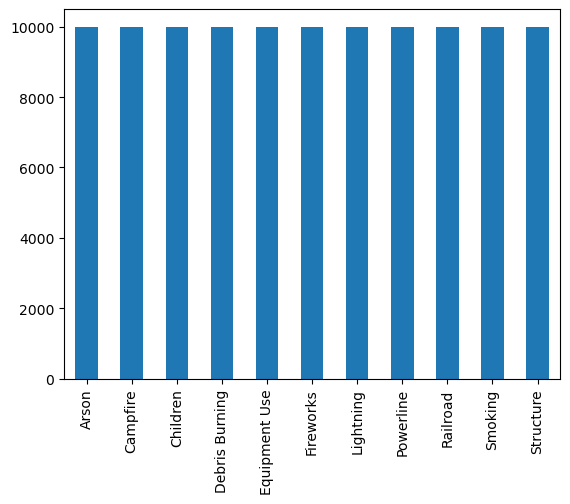

In [23]:
from imblearn.under_sampling import RandomUnderSampler


newSampStrat=RandomUnderSampler(sampling_strategy='not minority',random_state=441) #Goal balance all classes
xTrain,yTrain=newSampStrat.fit_resample(xTrain,yTrain) #perform the balancing newX and newY are balanced X and y
yTrain.value_counts().plot.bar() 

In [24]:
yTrain.value_counts()

Arson             10000
Campfire          10000
Children          10000
Debris Burning    10000
Equipment Use     10000
Fireworks         10000
Lightning         10000
Powerline         10000
Railroad          10000
Smoking           10000
Structure         10000
Name: STAT_CAUSE_DESCR, dtype: int64